# Predict Minerals Structure From Materials Characteristics
A list of of 3112 minerals, their chemical composition and properties

Workflow stages:

    1. Question or problem definition.
    2. Import protocol, acquire training and testing data.
    3. Wrangle, prepare, cleanse the data.
    4. Analyze, identify patterns, and explore the data.
    5. Model, predict and solve the problem.
    6. Visualize, report, and present the problem-solving steps and final solution.
    7. Supply or submit the results.


# Chapter 1: Question or problem definition

Predict minerals structure from materials characteristics.

# Chapter 2: Import protocol, acquire training and testing data

In [1]:
# Data handling tools
import numpy as np
import pandas as pd

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-machine learning tools
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Perform data standardization and auto values encoder
from sklearn.model_selection import train_test_split  # Split data

# Machine learning algorithms and tools
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classification
from sklearn.model_selection import GridSearchCV  # Exhaustive search over specified parameter values for an estimator

# Post-machine learning analysis
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score  # Report precision, recall, f1-score, and more

# Other
from warnings import filterwarnings  # Warning filters
filterwarnings(action='ignore') # Prevent convergence warning and math errors

In [2]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        df = pd.read_csv(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('Minerals_Database.csv')

# Chapter 3: Wrangle, prepare, cleanse the data

No empty Cell.

In [4]:
np.bincount(df.isna().any())

array([140], dtype=int64)

No duplicants.

In [5]:
df.duplicated().any()

False

The dataset contains a single int indexes column to be removed.
One object type column contains minerals names, which will be labeled encoded.
The remainder of the dataset (138 columns) is float type.

In [6]:
df.dtypes.value_counts()

float64    138
int64        1
object       1
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378


**Taking Action:**

    1. Removal of index column.

    2. label encoding of names.
    
    3. Convert Crystal Structure from float to int

In [8]:
# 1. Removal of index column.
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [9]:
# 2. label encoding of names.
key_encoder = LabelEncoder()
df['Name'] = key_encoder.fit_transform(df['Name'])

In [10]:
# 3. Convert Crystal Structure from float to int
df['Crystal Structure'] = df['Crystal Structure'].astype(int)

Checking actions:

In [11]:
display(df.dtypes.value_counts(), df.head())

float64    137
int32        2
dtype: int64

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,5,4.50,0.0,3.240,3.0,1.580,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,4,2.75,3.0,3.446,3.0,1.592,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,5,2.00,3.0,4.420,3.0,2.085,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,6,2,5.50,2.0,1.050,4.0,1.634,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378


Search below found no non-numericl value in the dataset.

In [12]:
df_len = len(df)
for column in df.columns:
    if df_len != np.bincount(pd.to_numeric(df[column], errors='coerce').isnull()):
        print('Non-numeric in column: column', column)
print('Search completed...')


Search completed...


The vast majority of features count the element per element type per mineral (118 features).

Below, a list of materials characteristics.

Dispersion is primarily empty and thus will not be used.

In [13]:
mat_chars_list = ['Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical',
                  'Refractive Index', 'count', 'Molar Mass', 'Molar Volume', 'Calculated Density']
                

Materials characteristics are available only to 809 minerals.

In [14]:
df_mat_chars = df[mat_chars_list].iloc[0:809]

## The code lines below display the distributions of the materials characteristics:


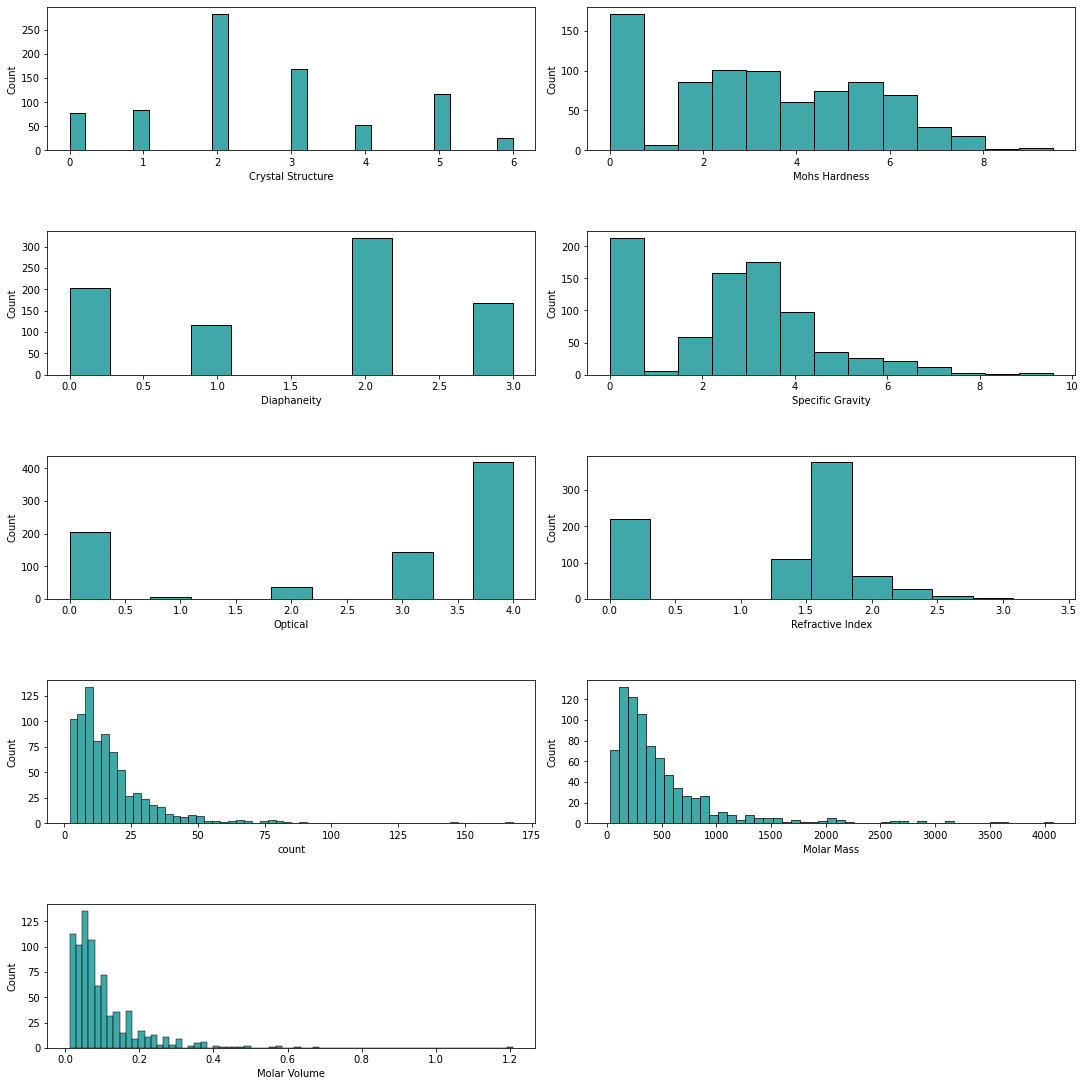

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(15, 15))
fig.delaxes(axs[4][1])
index = 0
axs = axs.flatten()
for k, v in df_mat_chars.items():
    g = sns.histplot(v, ax=axs[index], color='darkcyan')
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

#### Histograms Discussion:

**Crystal Structure:** 


Provides limited information as it represents the most basic crystal family. No spcific space group is given. Thus, the crystals structure histogram distribution and usability are limited.

**Nevertheless, it provides crucial information, which is that it is unbalanced.**

List of crystals families:

1-Triclinic,2-Monoclinic, 3-Orthorhombic, 4-Tetragonal, 5-Hexagonal, 6-Trigonal, 7-Cubic. 


**Mohs Hardness:**

The resistance of a smooth surface to scratching or abrasion is scaled from 0 to 10.

By definition, it can be deduced that all zero values are missing values as minerals are not of the softest materials in nature. 


**Diaphaneity:**

Level of Transparency. The description of this feature allows 1, 2, or 3 as legit values.

Therefore, all zeros and missing data.


Diaphaneity options:

1. Opaque 2. Translucent 3. Transparent


**Specific Gravity:**

The density of the mineral is divided by the density of water.

Since we do not expect zero density, their values need to be removed.


**Optical:**

This feature represents the reaction of the mineral to incoming light.

Based on possible options, zero is not defined.

Optical options:

1-Anisotropic, 2-Isotropic, 3-Uniaxial, 4-Biaxial


**Refractive Index:**

The Refractive index defines the ratio of the speed of light in the mineral divided by its speed in free space. 

Zero refractive indexes have physical meaning, and it is studied in academia, but we do not expect to find zero refractive index material in our database.


**The following features only require standardization:**

**Count:**

The total number of atoms in a formula unit of the mineral. 


**Molar Mass:**

Summation(no of atoms * mass of each atom).


**Molar Volume:**

Summation(no of atoms * volume of each atom).


**Calculated Density:**

Molar mass/ mass volume.



## Operative actions deduced from the above discussion:

* Remove all samples valued zero in the following features:

    * Mohs Hardness, Diaphaneity, Specific Gravity, and Refractive Index.
    

In [16]:
len(df_mat_chars)

809

In [17]:
df_mat_chars = df_mat_chars.loc[df['Mohs Hardness'] > 0]
df_mat_chars = df_mat_chars.loc[df['Diaphaneity'] > 0]
df_mat_chars = df_mat_chars.loc[df['Specific Gravity'] > 0]
df_mat_chars = df_mat_chars.loc[df['Refractive Index'] > 0]

In [18]:
len(df_mat_chars)

451

385 items were removed.
### Only 437 minerals have a complete set of material characteristics.

In [19]:
np.bincount(df['Crystal Structure'])

array([2380,   84,  284,  169,   53,  116,   26], dtype=int64)

### The values above show that the structural groups are unbalanced and require stratification before modeling.

## Data scaling

In [20]:
scaler = StandardScaler()
scaler.fit(df_mat_chars[mat_chars_list[1:]])
df_mat_chars[mat_chars_list[1:]] = scaler.transform(df_mat_chars[mat_chars_list[1:]])  

## The code lines below display box-plot distributions of the characteristics of the materials used for outliners analysis:

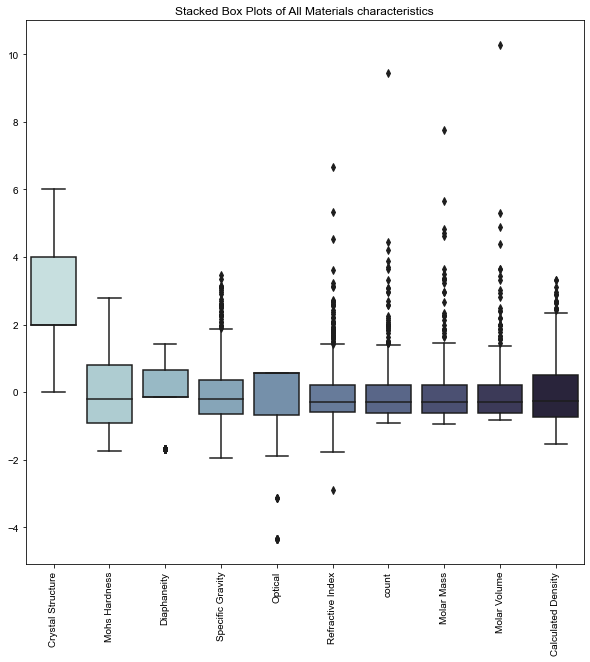

In [21]:
fig, axes = plt.subplots(figsize=(10, 10))
g = sns.boxplot(data=df_mat_chars, palette='ch:start=.2,rot=-.3')
g.set_title('Stacked Box Plots of All Materials characteristics')
plt.xticks(rotation=90)
sns.set(font_scale=2)

#### Box-plot Discussion:

**Outliners free:**

Crystal Structure, Mohs Hardness, and Diaphaneity.


**Contain some outliners:**

Optical.


**Contain outliners:**

Specific Gravity, Refractive Index, Count, Molar Mass, Molar Volume, and Calculated Density.




While it is crucial to identify outliers in the dataset, no outliners will be removed in this project as they may represent unique materials.

# Chapter 4: Analyze, identify patterns, and explore the data

## The code lines below display a heat-map of the characteristics of the materials used to detect linearity between features:

<AxesSubplot:>

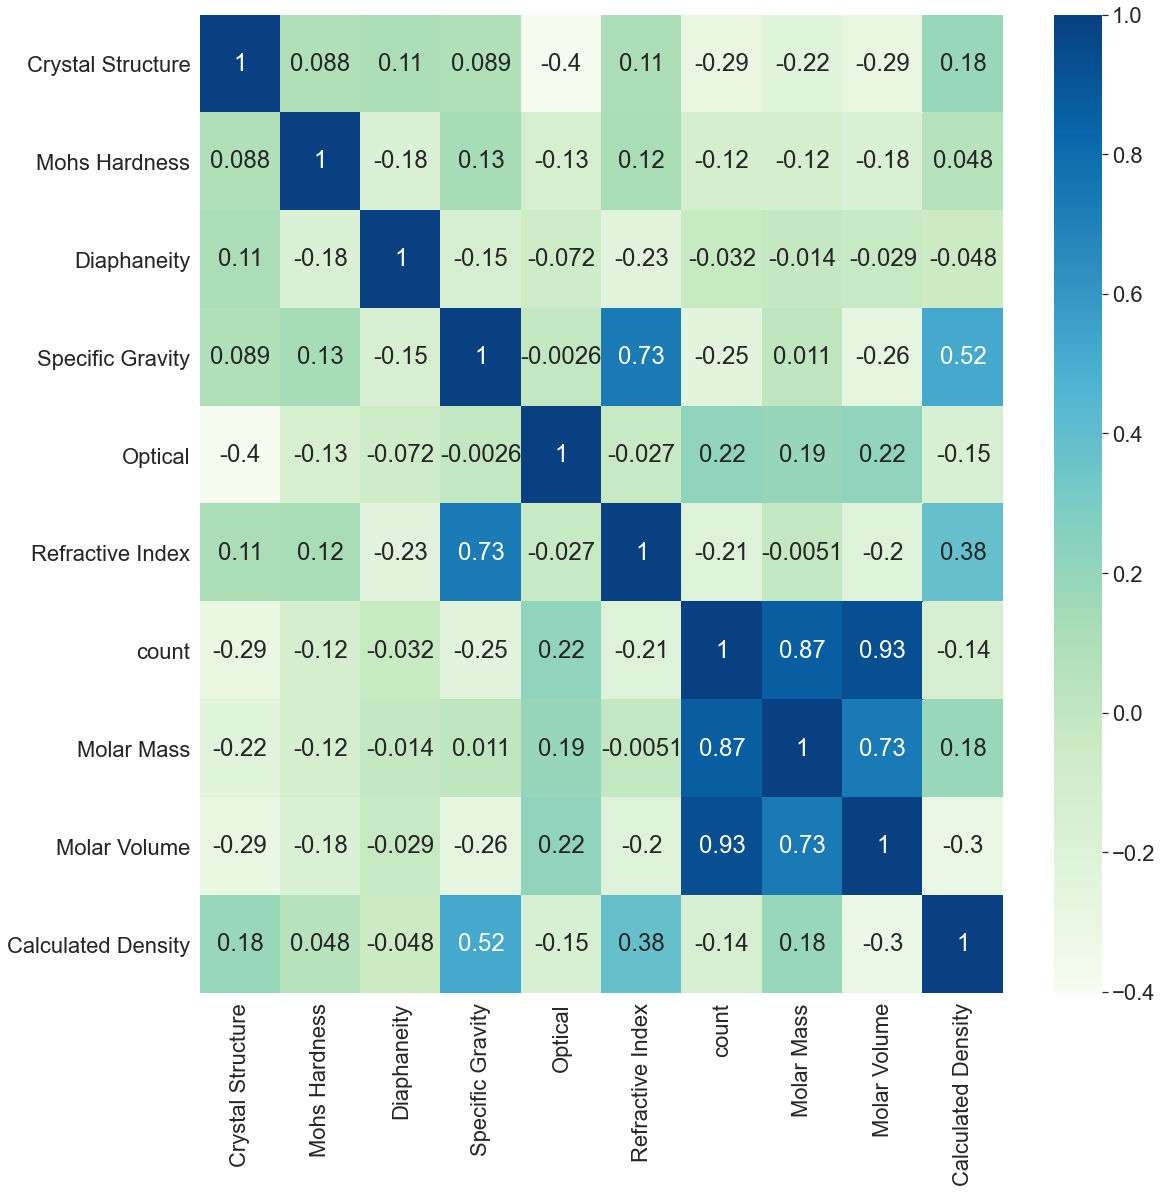

In [22]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_mat_chars.corr(), cmap='GnBu', annot=True)

#### Heat-map Highlights:

**Positively correlated  features:**

Count, molar mass, and volume.

Specific gravity and calculated density with refractive Index.


**Negatively correlated features:**

Crystal structure and optical.

Crystal structure and molar volume.

Crystal structure and count.

Molar volume and calculated density.


## Crystal structure:
Higher crystal structure value represented higher structural symmetry, which led to lower molar volume and atom count; This could be circumstantial. 

Notably, the data also shows opposite optical properties, which is intriguing.


## Refractive Index:

There is a correlation between the refractive index and the two features relevant to density (specific gravity and calculated density).


## The code lines below display a combined box-plot and kernel density estimate (KDE) that visualize the distribution of all material characteristics per crystal structure:

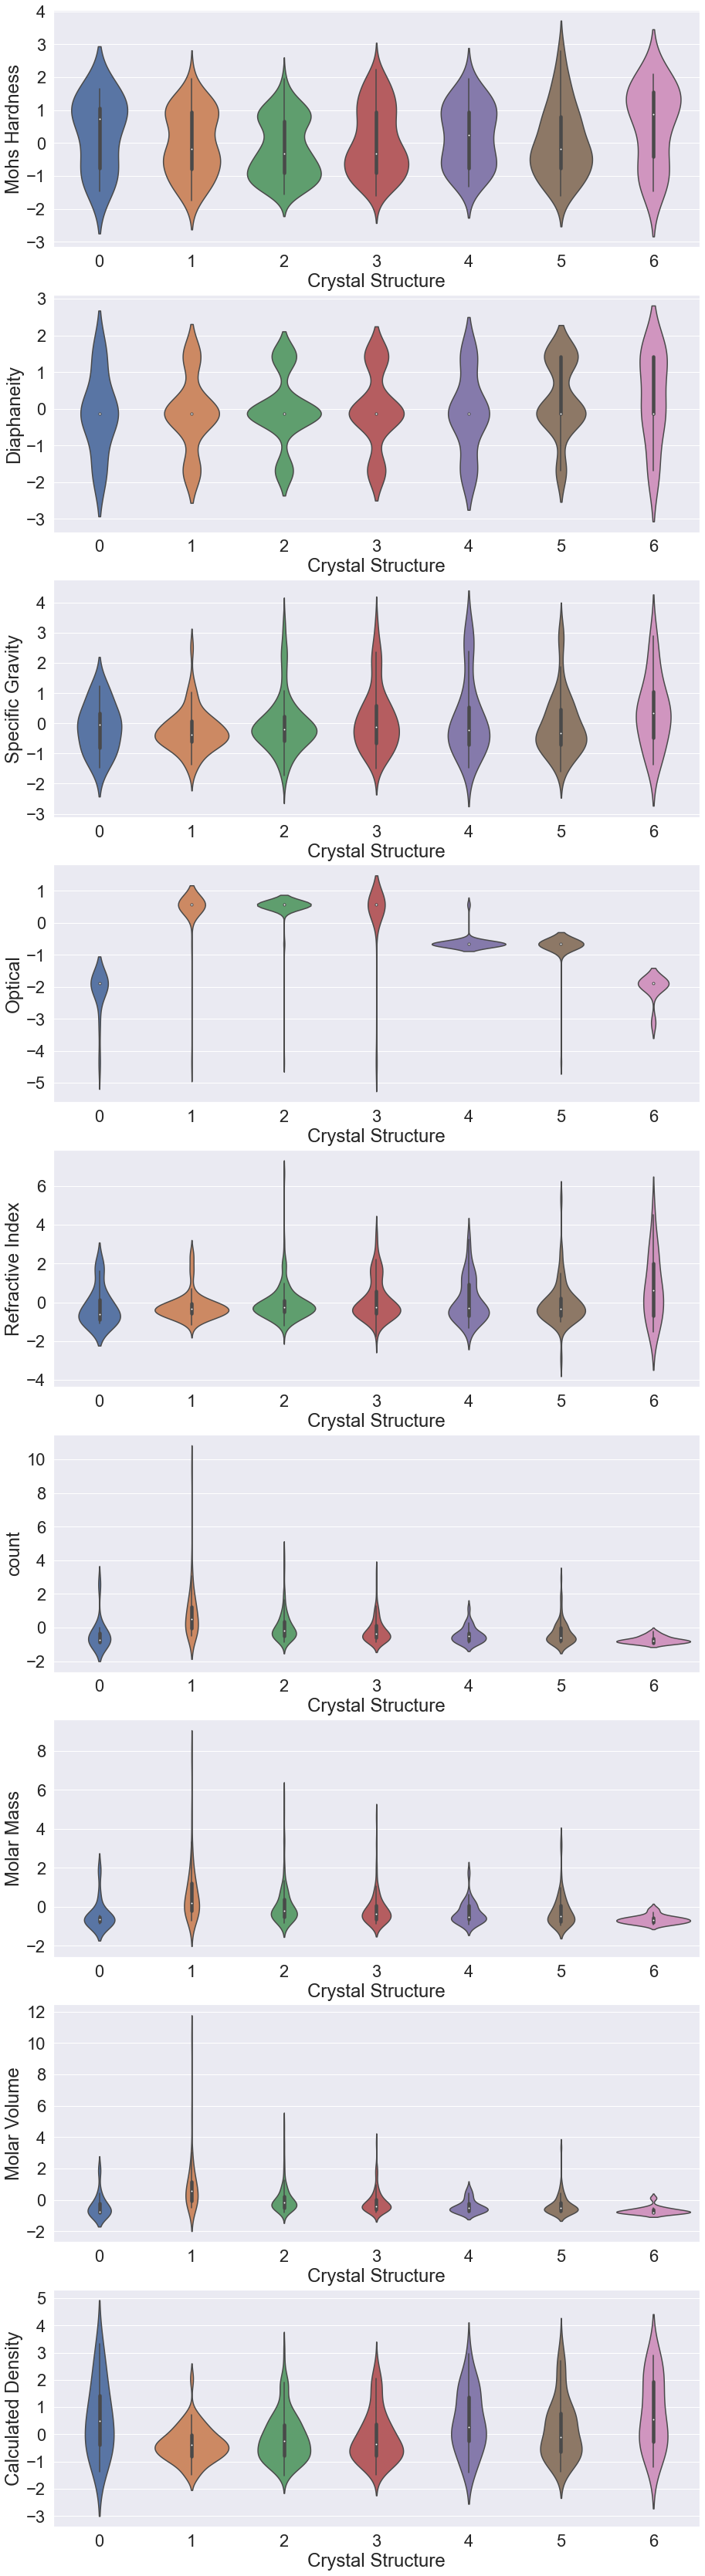

In [23]:
# Create subplots net.
fig, axes = plt.subplots(ncols=1, nrows=9, figsize=(15, 60))

# Fill subplots.
for idx, feature in enumerate(df_mat_chars.drop('Crystal Structure', axis=1)):
    g = sns.violinplot(ax=axes[idx], x='Crystal Structure', y=feature,
                    data=df_mat_chars)
    plt.sca(axes[idx])
    sns.set(font_scale=1)

#### Combined Box-plot and KDE Discussion:

Groups 1, 2, and 3 are almost identical in their characteristics, available in this dataset, and should be merged for better overall performance.

**Optical:**

Can separate the structures into 4 different groups: 0, 1-3, 4-5, and 6.


**Mohs Hardness, Calculated Density, Molar Mass:**

An apparent to separate groups 4 and 5 may be feasible by any of the features above.

Among the three, Calculated Density is the most significant due to differences in center of mass.


**Note:**
Groups 0 and 6 are visibly different from all others in most features.

# Chapter 5: Model, predict and solve the problem

**Model selection**

We have 6 crystal structures merged into wide or narrow sets.

Wide option:
Group num. 0: 0
Group num. 1: 1, 2 and 3 
Group num. 2: 4
Group num. 3: 5
Group num. 4: 6

Narrow option:
Group num. 0: 0
Group num. 1: 1, 2 and 3 
Group num. 2: 4 and 5
Group num. 3: 6

The optical feature will be used along with various Calculated Density or Mohs Hardness, Calculated Density, and Molar Mass.

Due to the small size dataset and feature quantity, KNN and decision tree models will be tested. The algorithm behind the two is very different as NKK calculates distances between points, and the decision tree splits the samples based on Gini/entropy calculations of the features relative to the labels of the samples.


In [24]:
x = []
x.append(df_mat_chars[['Optical', 'Calculated Density']])
x.append(df_mat_chars[['Optical', 'Mohs Hardness','Calculated Density', 'Molar Mass']])

y = df_mat_chars['Crystal Structure'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4})


List of models and hyperparameters for grid search:

In [25]:
models = []

models.append(('KNN', KNeighborsClassifier))
models.append(('DecisionTree', DecisionTreeClassifier))

In [26]:
models_parameters = []


# KNeighborsClassifier
models_parameters.append([{'leaf_size': [1, 2, 3, 5],
                           'n_neighbors': [3, 5, 9, 11],
                           'weights': ['uniform', 'distance']}])

# DecisionTree
models_parameters.append([{'criterion': ['gini', 'entropy'],
                           'max_depth': [3, 5, 7, 11, 13],
                          'min_samples_split': [2, 3, 7],
                           'min_samples_leaf': [1, 2, 3, 7]}])


In [27]:
models_all_data = np.concatenate((np.array(models), np.array(models_parameters)), axis=1)
models_all_data

array([['KNN',
        <class 'sklearn.neighbors._classification.KNeighborsClassifier'>,
        {'leaf_size': [1, 2, 3, 5], 'n_neighbors': [3, 5, 9, 11], 'weights': ['uniform', 'distance']}],
       ['DecisionTree',
        <class 'sklearn.tree._classes.DecisionTreeClassifier'>,
        {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 11, 13], 'min_samples_split': [2, 3, 7], 'min_samples_leaf': [1, 2, 3, 7]}]],
      dtype=object)

In [28]:
obj_model_list = []
models_score_table = []
y_prediction_train = []

for x_features in x:

    x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.33, random_state=42, stratify=y)
    print('_'*50)
    print(x_features.columns, '\n')

    for name, model, parameters in models_all_data:
        model_starter = model()
        obj_model_list.append(GridSearchCV(estimator=model_starter, param_grid=parameters))
        obj_model_list[-1].fit(x_train, y_train)
        y_prediction_train.append(obj_model_list[-1].predict(x_train).astype(int))
        accuracy_score_train = accuracy_score(y_train, y_prediction_train[-1])
        models_score_table.append([name, obj_model_list[-1].best_params_, round(accuracy_score_train * 100, 2), round(obj_model_list[-1].best_score_ * 100, 2)])
        print(models_score_table[-1])

__________________________________________________
Index(['Optical', 'Calculated Density'], dtype='object') 

['KNN', {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}, 89.4, 86.43]
['DecisionTree', {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}, 88.08, 85.77]
__________________________________________________
Index(['Optical', 'Mohs Hardness', 'Calculated Density', 'Molar Mass'], dtype='object') 

['KNN', {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}, 100.0, 83.45]
['DecisionTree', {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 7}, 95.03, 87.42]


In [29]:
# Convert output table to NumPy and extract methods with the best train and validate scores.
score = np.array(models_score_table)
train_score = score[:,2].astype(float)
validate_score = score[:,3].astype(float)

print('Best train score', score[np.where(train_score == np.amax(train_score)), :])
print('\nBest validate score', score[np.where(validate_score == np.amax(validate_score)), :])
train_position = np.where(train_score == np.amax(train_score))
validate_position = np.where(validate_score == np.amax(validate_score))
best_model_index = int(validate_position[0])

# Find the best balance between train to validate.
balanced_model = np.inf
balanced_idx = 0
for idx, data in enumerate(score):
    new_balanced_model = float(data[2]) - float(data[3])
    if new_balanced_model < balanced_model:
        balanced_model = new_balanced_model
        balanced_idx = idx

print('\nMost balanced model: ', score[balanced_idx, :])

Best train score [[['KNN' {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'} 100.0
   83.45]]]

Best validate score [[['DecisionTree'
   {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 7}
   95.03 87.42]]]

Most balanced model:  ['DecisionTree'
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
 88.08 85.77]


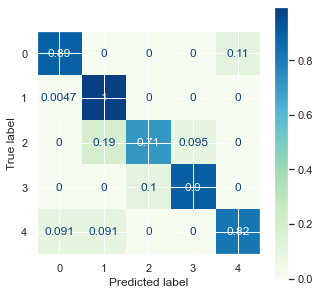

In [30]:
fig, axs = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(estimator=obj_model_list[best_model_index], X=x_train, y_true=y_train, ax=axs, cmap='GnBu', normalize='true')

## Confusion Matrix Discussion:
While differences were seen between groups 2 and 3, the model fails to separate the two.

A second run of train and validate with group 2 and 32 merged on the best model and features set.

In [31]:
y = df_mat_chars['Crystal Structure'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3})
x_train, x_test, y_train, y_test = train_test_split(x[1], y, test_size=0.33, random_state=42, stratify=y)

In [32]:
decision_tree_obj = models_all_data[1, 1]()
obj_model = GridSearchCV(estimator=decision_tree_obj, param_grid=[models_all_data[1, 2]], cv=5)
obj_model.fit(x_train, y_train)
y_prediction_train = obj_model.predict(x_train).astype(int)
accuracy_score_train = accuracy_score(y_train, y_prediction_train)

print('Decision tree')
print('Optimal parameters: ', obj_model.best_params_)
print('Train')
print('Accuracy score: ', round(accuracy_score_train * 100, 2))
print('Validation')
print('Accuracy score: ', round(obj_model.best_score_ * 100, 2))

Decision tree
Optimal parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train
Accuracy score:  94.7
Validation
Accuracy score:  93.72


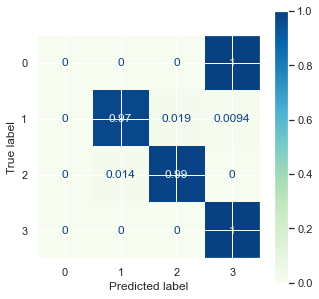

In [33]:
fig, axs = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(estimator=obj_model, X=x_train, y_true=y_train, ax=axs, cmap='GnBu', normalize='true')

## Confusion Matrix Discussion:
Merging groups 3 and 4 led to 6% improvment in the model.

## Test:

In [34]:
y_prediction_test = obj_model.predict(x_test).astype(int)
accuracy_score_test = accuracy_score(y_test, y_prediction_test)
test_classification_report = classification_report(y_test, y_prediction_test)

In [35]:
print('Model description with train and validate scores:')
print(models_score_table[best_model_index])
print('_'*50)
print('Test accuracy score:', round(accuracy_score_test * 100, 2))
print('_'*50)
print(test_classification_report)

Model description with train and validate scores:
['DecisionTree', {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 7}, 95.03, 87.42]
__________________________________________________
Test accuracy score: 95.3
__________________________________________________
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.98      0.99      0.99       105
           2       0.97      0.97      0.97        34
           3       0.56      1.00      0.71         5

    accuracy                           0.95       149
   macro avg       0.63      0.74      0.67       149
weighted avg       0.93      0.95      0.94       149



# Chapter 6: Visualize, report, and present the problem-solving steps and final solution

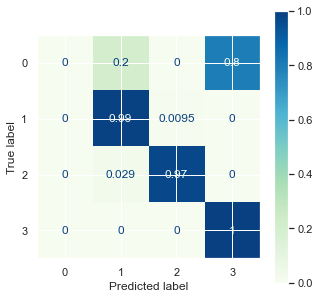

In [36]:
fig, axs = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(estimator=obj_model, X=x_test, y_true=y_test, ax=axs, cmap='GnBu', normalize='true')

**Results:**
  
The analysis of the material properties had shown diffeculities in seperation between part of the structures.
By merging 7 groups to 5 an ~87% accuracy was obtained and additional ~6% accuracy can be gained by 4 structures groups.

**Discussion:**

* Dataset:
    
    * Only 437 minerals have a complete set of material characteristics. Group 0 in the test dataset shows the effect of the undersized quantity of constructive samples. Increasing the database size will enable better machine learning output.
    
    * Optical is the single most significant feature. It can predict 4 different structural groups at once.


* Models performance:
    
    * KNN: K-nearest Neighbors classifier presented good results with the smaller features set of only two optical, calculated Density. Adding Mohs Hardness and Molar Mass created a mixture of distances between points that caused over-fitting.
    
    * Decision Tree: Decision tree performance was the highest. This model is efficient in a multi-classes environment due to its indifference to the number of classes. Adding more features to its pool allowed better performances.

**Summary**

* Data was analyzed, cleaned, and organized.

* 2 machine learning classifiers models were examined with multiple hyperparameters.

* The best model, by validation score, was applied to analyze the test dataset.

* Final prediction had ~94 accuracy.

**Future Tasks:** 

* Examine material properties based on the crystals' structure and the other characteristics.

# Chapter 7: Supply or submit the results.

No test file is available to predict and submit.